In [109]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

Graph with 6 nodes and 9 edges
{(1, 2): '1', (1, 3): '5', (1, 4): '3', (2, 3): '1', (3, 5): '3', (3, 6): '4', (3, 4): '2', (4, 5): '2', (5, 6): '2'}
[[0 1 5 3 0 0]
 [1 0 1 0 0 0]
 [5 1 0 2 3 4]
 [3 0 2 0 2 0]
 [0 0 3 2 0 2]
 [0 0 4 0 2 0]]


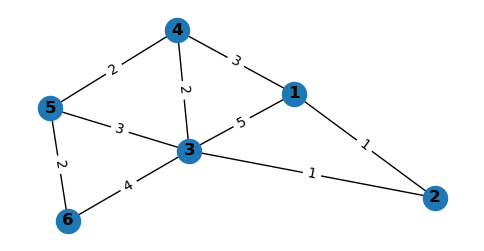

In [110]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_weighted_edges_from([
    (1, 2, 1),
    (1, 3, 5),
    (1, 4, 3),
    (2, 3, 1),
    (4, 5, 2),
    (3, 5, 3),
    (3, 6, 4),
    (5, 6, 2),
    (3, 4, 2),
])
print(G)

edge_labels = {e: str(G.get_edge_data(*e)["weight"]) for e in G.edges}
print(edge_labels)

A = nx.adjacency_matrix(G)
print(A.todense())

layout = nx.spring_layout(G)

plt.rcParams['figure.figsize'] = [6, 3]
fig, ax = plt.subplots()

nx.draw(G, ax=ax, with_labels=True, font_weight='bold', pos=layout)
nx.draw_networkx_edge_labels(G, ax=ax, pos=layout, edge_labels=edge_labels)
plt.show()

bfs_edges: [(1, 2), (1, 3), (1, 4), (3, 5), (3, 6)]


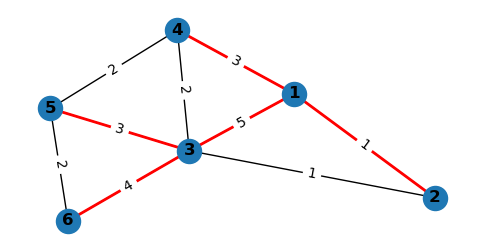

In [111]:
def bfs(G, source):
    bfs_edges = list(nx.bfs_edges(G, source))
    print(f"bfs_edges: {bfs_edges}")
    fig, ax = plt.subplots()
    nx.draw(G, ax=ax, with_labels=True, font_weight='bold', pos=layout)
    nx.draw_networkx_edges(G, ax=ax, pos=layout, edgelist=bfs_edges, edge_color="red", width=2)
    nx.draw_networkx_edge_labels(G, ax=ax, pos=layout, edge_labels=edge_labels)
    plt.show()

plt.rcParams['figure.figsize'] = [6, 3]
bfs(G, source=1)

[(1, 2), (2, 3), (3, 6)]


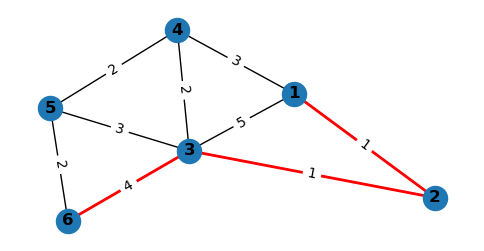

In [112]:
def dijkstra(G : nx.Graph, source, target):
    nodes = nx.dijkstra_path(G, source, target)
    edges = []
    for i in range(0, len(nodes)-1):
        edges.append((nodes[i], nodes[i+1]))
    print(edges)
    fig, ax = plt.subplots()
    nx.draw(G, ax=ax, with_labels=True, font_weight='bold', pos=layout)
    nx.draw_networkx_edges(G, ax=ax, pos=layout, edgelist=edges, edge_color="red", width=2)
    nx.draw_networkx_edge_labels(G, ax=ax, pos=layout, edge_labels=edge_labels)
    plt.show()

dijkstra(G, source=1, target=6)
